In [1]:
import pandas as pd
import numpy as np
from util import *

Using TensorFlow backend.


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('df_train.csv')

In [4]:
train_set = get_train_data(df_train, n_days=14)
test_set  = df_train.loc[df_train.index.difference(train_set.index)]

In [5]:
benchmark_mdl1 = BenchmarkModel1()
benchmark_mdl1.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [6]:
res_df_benchmark = benchmark_mdl1.predict_futures(n_ticks=96)

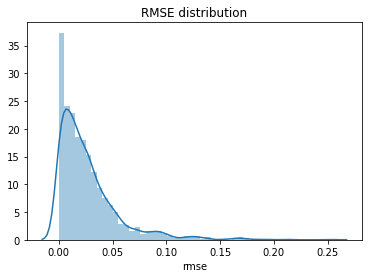

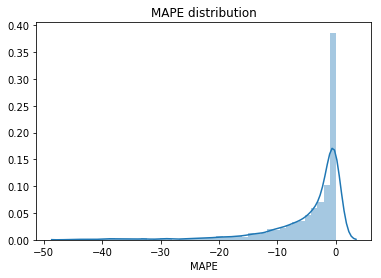

mean rmse: 0.026759431402815583
mean MAPE: -4.725870739428914


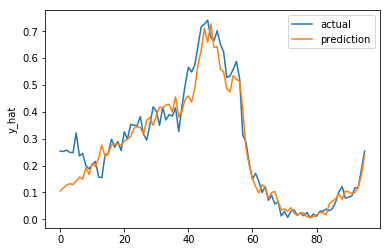

In [7]:
show_all_evaluation_metrics(res_df_benchmark, test_set)

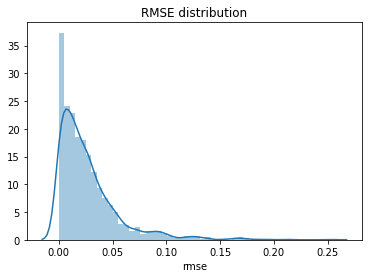

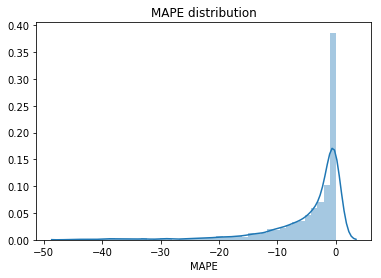

mean rmse: 0.026759431402815583
mean MAPE: -4.725870739428914


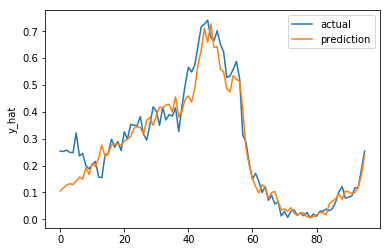

In [26]:
res_df_benchmark = benchmark_mdl2.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [9]:
res_df_benchmark['timestamp'] = res_df_benchmark['hour'].astype(str) + ':' + res_df_benchmark['minute'].astype(str)
pred_vs_act = test_set.merge(
    res_df_benchmark,
    left_on=['geohash6', 'day', 'timestamp'],
    right_on=['geohash6', 'day', 'timestamp'],
    how='inner'
)
pred_vs_act['err'] = pred_vs_act.y_hat - pred_vs_act.demand


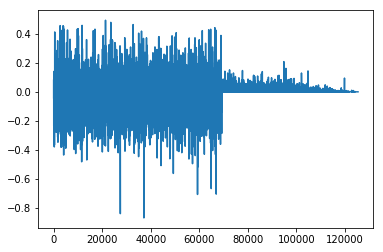

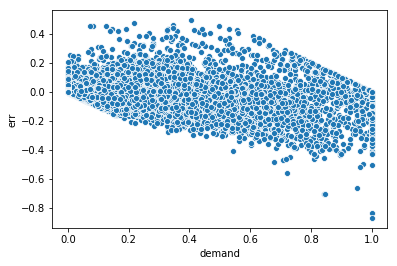

In [11]:
plt.plot(
    np.arange(pred_vs_act.shape[0]),
    pred_vs_act['err']
)
plt.show()

sns.scatterplot(
    pred_vs_act.demand,
    pred_vs_act['err']
)
plt.xlabel('demand')
plt.show()

In [12]:
pred_vs_act[
    pred_vs_act['err'] > 0.2
].groupby(['geohash6']).agg('mean').sort_values(by=['err'], ascending=False).head(10)

,Unnamed: 0,day,demand,hour,minute,is_weekend,dow,lat,long,hour_p8,y_hat,err
geohash6,,,,,,,,,,,,
qp09b3,61720.500000,15.0,0.077384,9.000000,22.500000,False,2.0,-5.309143,90.719604,17.000000,0.531105,0.453721
qp09b6,731819.000000,15.0,0.420775,14.090909,23.181818,False,2.0,-5.303650,90.719604,17.727273,0.758174,0.337398
qp09uy,622921.350000,15.0,0.610271,8.400000,22.500000,False,2.0,-5.281677,90.917358,16.400000,0.933243,0.322973
qp09ft,620487.140000,15.0,0.401827,12.340000,23.100000,False,2.0,-5.287170,90.818481,15.060000,0.724773,0.322945
qp09b7,561282.714286,15.0,0.276963,12.333333,22.142857,False,2.0,-5.298157,90.719604,15.761905,0.571366,0.294403
qp098r,683258.400000,15.0,0.187167,7.600000,18.000000,False,2.0,-5.320129,90.719604,15.600000,0.476817,0.289651
qp02zw,389583.000000,15.0,0.720291,10.666667,25.000000,False,2.0,-5.457458,90.686646,18.666667,0.997320,0.277029
qp09e5,657957.800000,15.0,0.503833,16.000000,24.000000,False,2.0,-5.342102,90.840454,4.800000,0.779022,0.275189
qp09be,844130.600000,15.0,0.061781,15.200000,18.000000,False,2.0,-5.298157,90.730591,18.400000,0.334017,0.272236


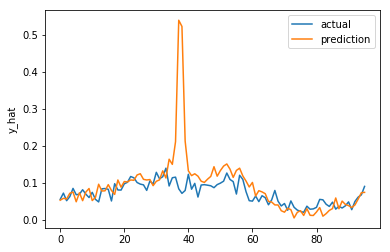

In [16]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09b3')

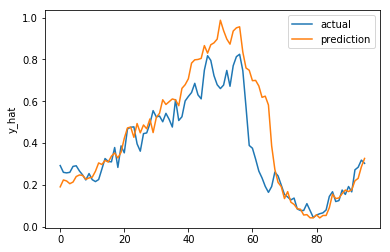

In [17]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09b6')

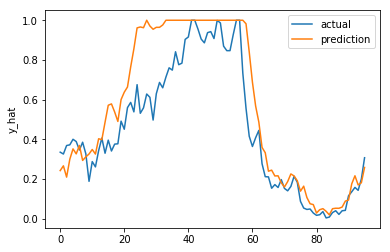

In [18]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09uy')

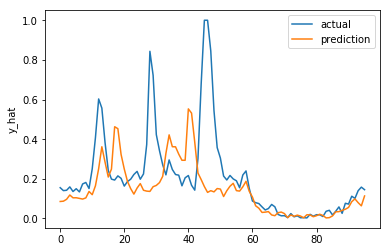

In [19]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp098r')

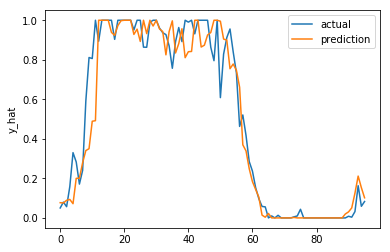

In [21]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp02zw')

In [8]:
cat_mdl = MyCatBoostModel()
cat_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

0:	learn: 0.1311217	total: 307ms	remaining: 30.4s
1:	learn: 0.1273875	total: 527ms	remaining: 25.8s
2:	learn: 0.1237832	total: 782ms	remaining: 25.3s
3:	learn: 0.1202755	total: 1.04s	remaining: 25s
4:	learn: 0.1168399	total: 1.26s	remaining: 24s
5:	learn: 0.1135313	total: 1.47s	remaining: 23.1s
6:	learn: 0.1103442	total: 1.69s	remaining: 22.5s
7:	learn: 0.1072280	total: 1.92s	remaining: 22s
8:	learn: 0.1042254	total: 2.14s	remaining: 21.6s
9:	learn: 0.1013253	total: 2.35s	remaining: 21.2s
10:	learn: 0.0984951	total: 2.57s	remaining: 20.8s
11:	learn: 0.0957582	total: 2.8s	remaining: 20.5s
12:	learn: 0.0930808	total: 3.02s	remaining: 20.3s
13:	learn: 0.0904835	total: 3.25s	remaining: 20s
14:	learn: 0.0879701	total: 3.47s	remaining: 19.7s
15:	learn: 0.0855404	total: 3.69s	remaining: 19.4s
16:	learn: 0.0831795	total: 3.92s	remaining: 19.1s
17:	learn: 0.0808922	total: 4.14s	remaining: 18.9s
18:	learn: 0.0786899	total: 4.35s	remaining: 18.6s
19:	learn: 0.0765438	total: 4.57s	remaining: 18.3s

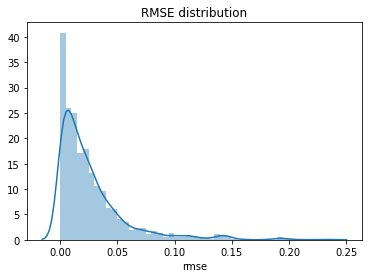

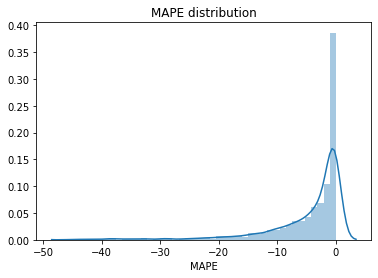

mean rmse: 0.026889828538342035
mean MAPE: -4.716178984223346


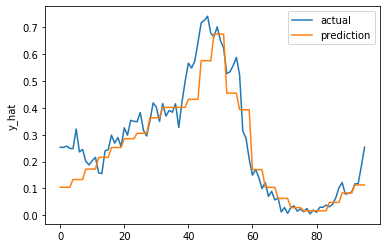

In [9]:
res_df_benchmark = cat_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [10]:
res_df_benchmark['timestamp'] = res_df_benchmark['hour'].astype(str) + ':' + res_df_benchmark['minute'].astype(str)
pred_vs_act = test_set.merge(
    res_df_benchmark,
    left_on=['geohash6', 'day', 'timestamp'],
    right_on=['geohash6', 'day', 'timestamp'],
    how='inner'
)


In [17]:
pred_vs_act['err'] = np.abs(pred_vs_act.y_hat - pred_vs_act.demand)

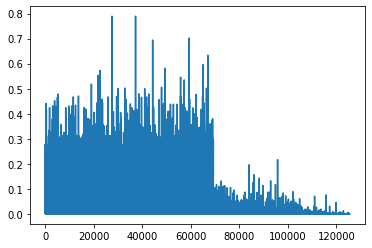

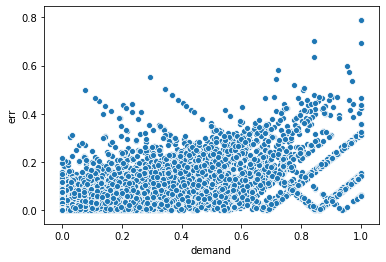

In [18]:
plt.plot(
    np.arange(pred_vs_act.shape[0]),
    pred_vs_act['err']
)
plt.show()

sns.scatterplot(
    pred_vs_act.demand,
    pred_vs_act['err']
)
plt.xlabel('demand')
plt.show()

Observation:
1. The more demand the less the error. There is a linear relationship between the demand

Hypothesis:
1. It seems that there are some geo that suffer greater losses

In [19]:
pred_vs_act[
    pred_vs_act['err'] > 0.2
].groupby(['geohash6']).agg('mean').sort_values(by=['err'], ascending=False).head(10)

,Unnamed: 0,day,demand,hour,minute,is_weekend,dow,lat,long,hour_p8,is_working_hour,y_hat,err
geohash6,,,,,,,,,,,,,
qp098r,610817.705882,15.0,0.542485,8.235294,20.294118,0.0,2.0,-5.320129,90.719604,16.235294,0.647059,0.220120,0.419175
qp02zw,599432.857143,15.0,0.633281,5.000000,23.571429,0.0,2.0,-5.457458,90.686646,13.000000,0.714286,0.385966,0.378014
qp09e5,548570.272727,15.0,0.638114,11.090909,28.636364,0.0,2.0,-5.342102,90.840454,3.818182,0.000000,0.618338,0.360791
qp09b6,827251.909091,15.0,0.325026,14.818182,23.181818,0.0,2.0,-5.303650,90.719604,14.090909,0.000000,0.685639,0.360613
qp03wf,792211.600000,15.0,0.827800,3.200000,25.500000,0.0,2.0,-5.347595,90.653687,8.800000,0.500000,0.468141,0.359658
qp096q,675723.400000,15.0,0.885358,4.700000,26.250000,0.0,2.0,-5.369568,90.807495,10.300000,0.650000,0.554020,0.352749
qp03xk,653914.250000,15.0,0.769551,4.500000,22.500000,0.0,2.0,-5.336609,90.675659,8.500000,0.500000,0.417853,0.351698
qp03wu,723770.500000,15.0,0.681613,3.700000,25.500000,0.0,2.0,-5.336609,90.653687,9.300000,0.500000,0.343348,0.338264
qp09b7,579761.615385,15.0,0.225542,14.230769,26.538462,0.0,2.0,-5.298157,90.719604,14.846154,0.153846,0.561218,0.335675


In [20]:
pred_vs_act.groupby(['geohash6']).agg('mean').err.mean()

0.01885163098831719

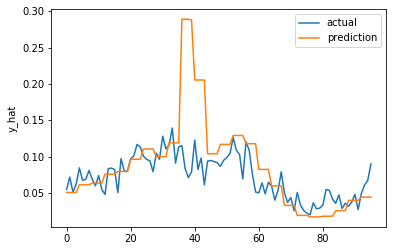

In [21]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09b3')

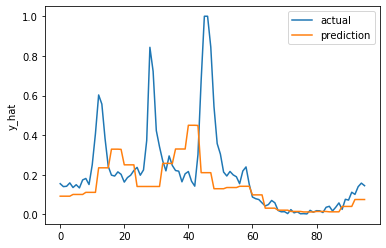

In [22]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp098r')

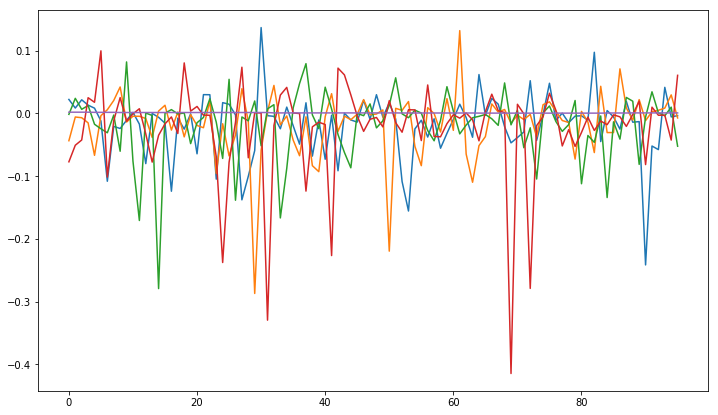

In [32]:
f, ax = plt.subplots(figsize=(12, 7))
for geo_sample in ['qp03wc', 'qp02yc', 'qp02yf', 'qp02yv', 'qp0dnh']:
    _resid = resid[
        res_df_benchmark[
            res_df_benchmark.geohash6 == geo_sample
        ].index
    ]
    plt.plot(
        np.arange(_resid.shape[0]),
        _resid
    )
plt.show()


Our CatBoost model outperform benchmark model by little and we could see that tree based models like CatBoost form step functions

In [24]:
ext_mdl = MyExtraTreeModel()
ext_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [28]:
ext_mdl.fit_raw(train_set)

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


KeyboardInterrupt: 

In [ ]:
res_df_benchmark = ext_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [ ]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09b3')

In [ ]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp098r')

In [20]:
elastic_mdl = MyElasticNetModel()
elastic_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
res_df_benchmark = elastic_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [5]:
xgb_mdl = MyXGBModel()
xgb_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

[22:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


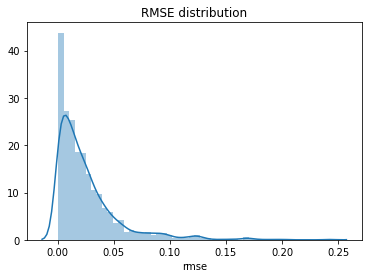

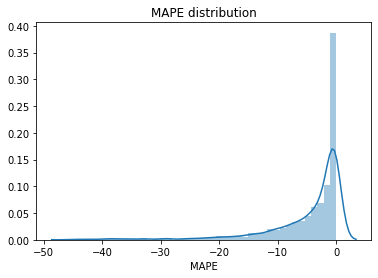

mean rmse: 0.025588724415189883
mean MAPE: -4.732708892551824


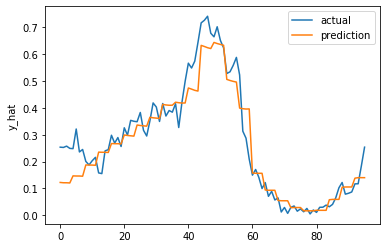

In [6]:
res_df_benchmark = xgb_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [14]:
res_df_benchmark['timestamp'] = res_df_benchmark['hour'].astype(str) + ':' + res_df_benchmark['minute'].astype(str)
pred_vs_act = test_set.merge(
    res_df_benchmark,
    left_on=['geohash6', 'day', 'timestamp'],
    right_on=['geohash6', 'day', 'timestamp'],
    how='inner'
)
pred_vs_act['err'] = pred_vs_act.demand - pred_vs_act.y_hat
pred_vs_act['abs_err'] = np.abs(pred_vs_act.demand - pred_vs_act.y_hat)

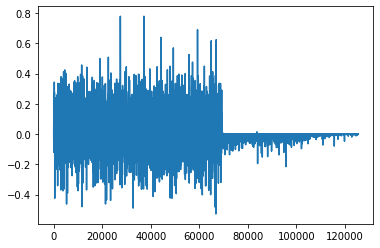

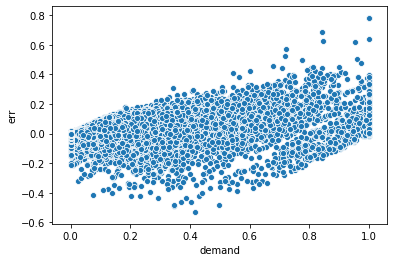

In [15]:
plt.plot(
    np.arange(pred_vs_act.shape[0]),
    pred_vs_act['err']
)
plt.show()

sns.scatterplot(
    pred_vs_act.demand,
    pred_vs_act['err']
)
plt.xlabel('demand')
plt.show()

In [16]:
pred_vs_act.groupby(['geohash6']).agg('mean').err.mean()

0.0028867696293588814

In [17]:
pred_vs_act.groupby(['geohash6']).agg('mean').abs_err.mean()

0.017903171480478576

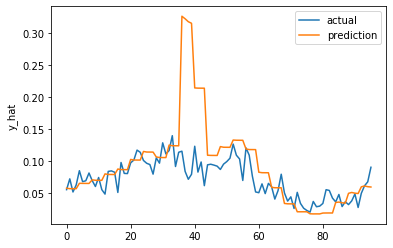

In [18]:
show_prediction_vs_actual_for_geo(pred_vs_act, geo_to_look_at='qp09b3')

In [13]:
pred_vs_act.head()

,Unnamed: 0,geohash6,day,timestamp,demand,day_timestamp,hour,minute,is_weekend,dow,lat,long,hour_p8,is_working_hour,y_hat,err
0,3,qp090q,15,4:0,0.074468,15:4:0,4,0,False,2,-5.413513,90.719604,12,True,0.032186,0.042282
1,52,qp0dhu,15,10:30,0.006172,15:10:30,10,30,False,2,-5.248718,90.917358,18,True,0.000543,0.005630
2,70,qp096v,15,4:45,0.860695,15:4:45,4,45,False,2,-5.375061,90.829468,12,True,0.858360,0.002335
3,82,qp0979,15,8:30,0.072087,15:8:30,8,30,False,2,-5.397034,90.862427,16,True,0.058953,0.013134
4,87,qp094m,15,0:30,0.100885,15:0:30,0,30,False,2,-5.419006,90.807495,8,False,0.034391,0.066494


In [11]:
train_y_hat = xgb_mdl.predict(xgb_mdl.df_train)

In [12]:
train_wt_pred = xgb_mdl.df_train.copy()
train_wt_pred['y_hat'] = train_y_hat

In [13]:
train_wt_pred.head()

,Unnamed: 0,geohash6,day,timestamp,demand,day_timestamp,is_weekend,dow,lat,long,...,demand_gdow_q95,demand_gdow_q10,demand_diff_wt_gdow_q95,demand_diff_wt_gdow_q10,mean_demand_diff_wt_gdow_q95,mean_demand_diff_wt_gdow_q10,cluster_gdowh,cluster_prob_gdowh,demand_rolling_4,y_hat
0,1,qp03pn,10,14:30,0.024721,10:14:30,False,4,-5.413513,90.664673,...,0.139647,0.0,-0.114926,0.024721,-0.09623,0.043416,0,0.671234,0.022579,0.018798
1,40002,qp03pn,10,14:15,0.009471,10:14:15,False,4,-5.413513,90.664673,...,0.139647,0.0,-0.130175,0.009471,-0.09623,0.043416,0,0.671234,0.021796,0.018248
2,63459,qp03pn,3,14:15,0.010866,3:14:15,False,4,-5.413513,90.664673,...,0.139647,0.0,-0.128781,0.010866,-0.09623,0.043416,0,0.671234,0.029381,0.025019
3,271643,qp03pn,3,14:45,0.036063,3:14:45,False,4,-5.413513,90.664673,...,0.139647,0.0,-0.103584,0.036063,-0.09623,0.043416,0,0.671234,0.025105,0.021032
4,733600,qp03pn,3,14:0,0.026552,3:14:0,False,4,-5.413513,90.664673,...,0.139647,0.0,-0.113095,0.026552,-0.09623,0.043416,0,0.671234,0.030957,0.027419


In [14]:
train_wt_pred.to_csv('train_wt_pred.csv')

In [5]:
train_wt_pred = pd.read_csv('train_wt_pred.csv')

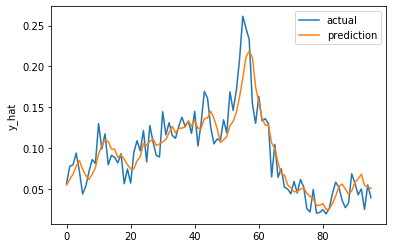

In [6]:
show_prediction_vs_actual_for_geo(train_wt_pred[train_wt_pred.day == 11], 'qp09b3')

In [7]:
train_wt_pred['err'] = train_wt_pred.y_hat - train_wt_pred.demand

In [179]:
res = rmse_per_region_geo(
    train_wt_pred.geohash6,
    train_wt_pred['demand'],
    train_wt_pred['y_hat']
)

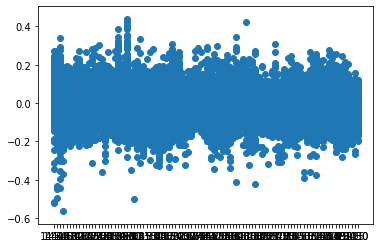

In [11]:
plt.scatter(
    train_wt_pred['timestamp'],
    train_wt_pred['err']
)
plt.show()

In [8]:
train_wt_pred['y_true'] = train_wt_pred['demand']
train_wt_pred['demand'] = train_wt_pred['err']

In [9]:
lv2_df_train = train_wt_pred.copy()

In [10]:
lv2_df_train = preprocess(lv2_df_train)
lv2_df_train = more_preprocess(lv2_df_train)

In [11]:
lv2_df_train.head()

,Unnamed: 0,Unnamed: 0.1,geohash6,day,timestamp,demand,day_timestamp,is_weekend,dow,lat,...,mean_demand_diff_wt_gdow_q95,mean_demand_diff_wt_gdow_q10,cluster_gdowh_x,cluster_prob_gdowh_x,demand_rolling_4,y_hat,err,y_true,cluster_gdowh_y,cluster_prob_gdowh_y
0,0,1,qp03pn,10,14:30,-0.005923,10:14:30,False,4,-5.413513,...,-0.020592,0.017502,0,0.671234,-0.000006,0.018798,-0.005923,0.024721,5,0.536024
1,1,40002,qp03pn,10,14:15,0.008776,10:14:15,False,4,-5.413513,...,-0.020592,0.017502,0,0.671234,0.002947,0.018248,0.008776,0.009471,5,0.536024
2,2,63459,qp03pn,3,14:15,0.014153,3:14:15,False,4,-5.413513,...,-0.020592,0.017502,0,0.671234,-0.005287,0.025019,0.014153,0.010866,5,0.536024
3,3,271643,qp03pn,3,14:45,-0.015030,3:14:45,False,4,-5.413513,...,-0.020592,0.017502,0,0.671234,-0.000504,0.021032,-0.015030,0.036063,5,0.536024
4,4,733600,qp03pn,3,14:0,0.000867,3:14:0,False,4,-5.413513,...,-0.020592,0.017502,0,0.671234,-0.008062,0.027419,0.000867,0.026552,5,0.536024


In [84]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [16]:
cat_features = ['is_weekend','dow','hour','cluster_gdowh']
cat_features.remove('cluster_gdowh')

num_features = [
     'lat','long','minute','mean_demand_per_geo',
    'median_demand_per_geo','mean_demand_per_gdow','median_demand_per_gdow','mean_enc_demand_tmin1',
    'mean_enc_demand_tmin4','mean_enc_demand_tmin672','demand_gdow_q95','demand_gdow_q10',
    'mean_demand_diff_wt_gdow_q95','mean_demand_diff_wt_gdow_q10','cluster_prob_gdowh','demand_rolling_4'
]
num_features.remove('cluster_prob_gdowh')

features = cat_features + num_features


In [17]:
feature_preprocess = make_column_transformer(
    (cat_features, OneHotEncoder()),
    (num_features, SimpleImputer(strategy='constant', fill_value=0))
)

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [97]:
mdl_xgb_lv2 = make_pipeline(
    feature_preprocess,
    XGBRegressor(n_jobs=4, n_estimators=100)
)


In [109]:
lv2_df_train[
    lv2_df_train.geohash6 == 'qp09b3'
].head()

,Unnamed: 0,geohash6,day,timestamp,demand,day_timestamp,is_weekend,dow,lat,long,...,cluster_gdowh_x,cluster_prob_gdowh_x,demand_rolling_4,y_hat,err,y_true,lv2_y_hat,ensemble_y_hat,cluster_gdowh_y,cluster_prob_gdowh_y
10424,1761,qp09b3,9,13:30,-0.019302,9:13:30,False,3,-5.309143,90.719604,...,1,0.965935,-0.009992,0.114652,-0.019302,0.133954,0.000545,0.115197,0,0.50939
10425,302337,qp09b3,2,13:30,0.024124,2:13:30,False,3,-5.309143,90.719604,...,1,0.965935,-0.003457,0.081480,0.024124,0.057357,0.000512,0.081992,0,0.50939
10426,385797,qp09b3,9,13:15,-0.026626,9:13:15,False,3,-5.309143,90.719604,...,1,0.965935,-0.007250,0.110488,-0.026626,0.137114,0.000508,0.110996,0,0.50939
10427,418995,qp09b3,2,13:45,-0.004835,2:13:45,False,3,-5.309143,90.719604,...,1,0.965935,0.001530,0.074484,-0.004835,0.079319,0.000578,0.075062,0,0.50939
10428,592864,qp09b3,2,13:0,-0.025499,2:13:0,False,3,-5.309143,90.719604,...,1,0.965935,-0.005239,0.082757,-0.025499,0.108255,-0.000463,0.082294,0,0.50939


In [98]:
mdl_xgb_lv2.fit(
    lv2_df_train[features],
    lv2_df_train['demand']
)

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a fut

[09:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['is_weekend', 'dow',
                              

In [110]:
lv2_df_train['lv2_y_hat'] = mdl_xgb_lv2.predict(lv2_df_train[features])

In [111]:
lv2_df_train['ensemble_y_hat'] = lv2_df_train['y_hat'] + lv2_df_train['lv2_y_hat']

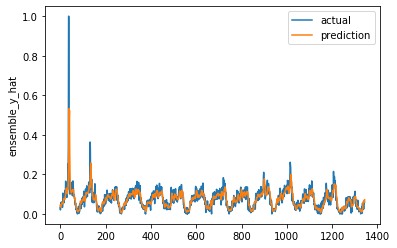

In [112]:
show_prediction_vs_actual_for_geo(
    lv2_df_train,
    'qp09b3',
    target_col='y_true', 
    pred_col='ensemble_y_hat'
)

In [113]:
result_lv1 = rmse_per_region_geo(
    lv2_df_train['geohash6'],
    lv2_df_train['y_true'],
    lv2_df_train['y_hat']
)

In [114]:
result_lv2 = rmse_per_region_geo(
    lv2_df_train['geohash6'],
    lv2_df_train['y_true'],
    lv2_df_train['ensemble_y_hat']
)

In [115]:
print(result_lv1.rmse.mean())
print(result_lv1.MAPE.mean())

0.014223263355744687
-4.463863611137899


In [116]:
print(result_lv2.rmse.mean())
print(result_lv2.MAPE.mean())

0.01884546007769765
-4.439842431663313


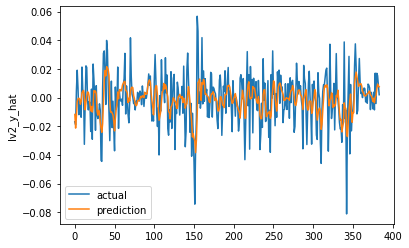

In [117]:
show_prediction_vs_actual_for_geo(
    lv2_df_train[lv2_df_train.day.isin([10,11, 12, 13])], 'qp09b3',
    target_col='demand',
    pred_col='lv2_y_hat'
)

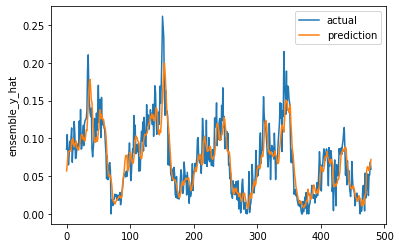

In [119]:
show_prediction_vs_actual_for_geo(
    lv2_df_train[lv2_df_train.day.isin([10,11, 12, 13, 14])], 'qp09b3',
    target_col='y_true',
    pred_col='ensemble_y_hat'
)

In [25]:
xgb_2lv_mdl = MySimple2LvXGBoostModel()
xgb_2lv_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

[00:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyError: 'target_column'

In [26]:
xgb_2lv_mdl.fit_raw(train_set)

/home/arie/external/aiforsea-private/util.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

[00:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


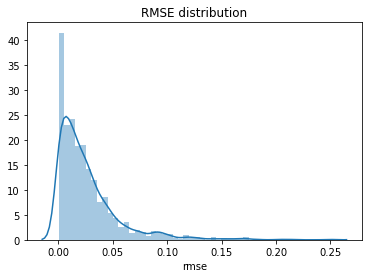

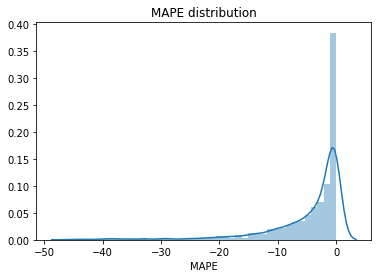

mean rmse: 0.026123143395928146
mean MAPE: -4.728673216250214


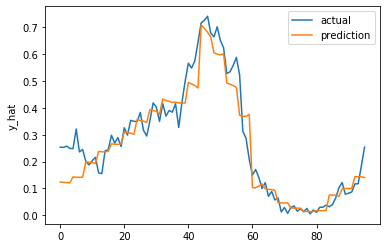

In [29]:
res_df_benchmark = xgb_2lv_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [30]:
res_df_benchmark['timestamp'] = res_df_benchmark['hour'].astype(str) + ':' + res_df_benchmark['minute'].astype(str)
pred_vs_act = test_set.merge(
    res_df_benchmark,
    left_on=['geohash6', 'day', 'timestamp'],
    right_on=['geohash6', 'day', 'timestamp'],
    how='inner'
)
pred_vs_act['err'] = pred_vs_act.demand - pred_vs_act.y_hat
pred_vs_act['abs_err'] = np.abs(pred_vs_act['abs_err'])

In [38]:
pred_vs_act['err2'] = pred_vs_act.demand - (pred_vs_act.lv1_yhat - pred_vs_act.lv2_yhat)
pred_vs_act['abs_err2'] = np.abs(pred_vs_act['err2'])

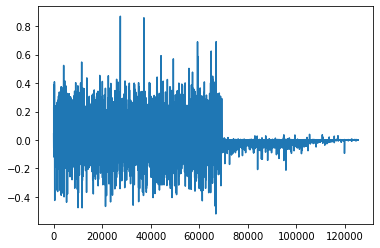

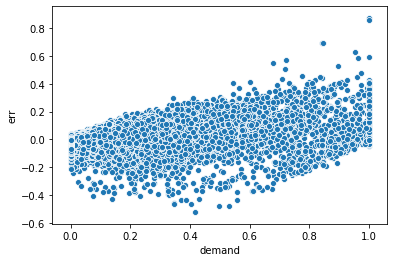

In [31]:
plt.plot(
    np.arange(pred_vs_act.shape[0]),
    pred_vs_act['err']
)
plt.show()

sns.scatterplot(
    pred_vs_act.demand,
    pred_vs_act['err']
)
plt.xlabel('demand')
plt.show()

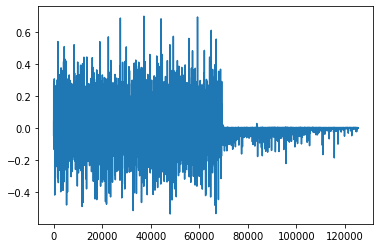

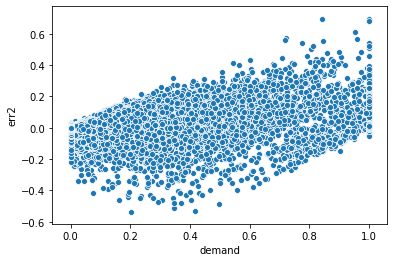

In [40]:
plt.plot(
    np.arange(pred_vs_act.shape[0]),
    pred_vs_act['err2']
)
plt.show()

sns.scatterplot(
    pred_vs_act.demand,
    pred_vs_act['err2']
)
plt.xlabel('demand')
plt.show()

In [34]:
pred_vs_act.groupby(['geohash6']).agg('mean').abs_err.mean()

0.01804520748883761

In [39]:
pred_vs_act.groupby(['geohash6']).agg('mean').abs_err2.mean()

0.019080796670755153

In [43]:
pred_vs_act[
    pred_vs_act.abs_err > 0.2
].describe()

,Unnamed: 0,day,demand,hour,minute,dow,lat,long,hour_p8,y_hat_x,lv1_yhat,y_hat_y,lv2_yhat,y_hat,err,abs_err,err2,abs_err2
count,7.960000e+02,796.0,796.000000,796.000000,796.000000,796.0,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,6.534090e+05,15.0,0.614939,7.484925,23.479899,2.0,-5.339597,90.747360,12.922111,0.504265,0.504265,-0.005527,-0.005527,0.498737,0.116202,0.276369,0.105148,0.255909
std,3.692516e+05,0.0,0.264754,6.331793,16.953903,0.0,0.036839,0.088785,5.949808,0.218011,0.218011,0.040939,0.040939,0.220175,0.262318,0.076517,0.252594,0.096446
min,5.070000e+02,15.0,0.000000,0.000000,0.000000,2.0,-5.468445,90.642700,0.000000,0.037051,0.037051,-0.203245,-0.203245,0.046650,-0.519367,0.200062,-0.535105,0.000271
25%,3.375928e+05,15.0,0.423798,1.000000,15.000000,2.0,-5.358582,90.675659,8.000000,0.336329,0.336329,-0.017062,-0.017062,0.335393,-0.209296,0.222797,-0.153589,0.198604
50%,6.702525e+05,15.0,0.612369,7.000000,30.000000,2.0,-5.336609,90.719604,13.000000,0.481181,0.481181,-0.001356,-0.001356,0.485875,0.228709,0.253012,0.208934,0.244138
75%,9.697372e+05,15.0,0.827527,12.000000,45.000000,2.0,-5.320129,90.818481,18.000000,0.675392,0.675392,0.012976,0.012976,0.664270,0.280334,0.308329,0.270226,0.299607
max,1.810910e+06,15.0,1.000000,23.000000,45.000000,2.0,-5.254211,90.972290,23.000000,1.001220,1.001220,0.120967,0.120967,1.028221,0.869954,0.869954,0.696087,0.696087


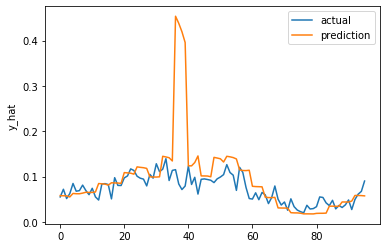

In [41]:
show_prediction_vs_actual_for_geo(pred_vs_act, target_col='err', geo_to_look_at='qp09b3')

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [37]:
cat_features = ['is_weekend','dow','hour','cluster_gdowh', 'geohash6','minute']
cat_features.remove('cluster_gdowh')

num_features = [
     'mean_demand_per_geo',
    'median_demand_per_geo','mean_demand_per_gdow','median_demand_per_gdow','mean_enc_demand_tmin1',
    'mean_enc_demand_tmin4','mean_enc_demand_tmin672','demand_gdow_q95','demand_gdow_q10',
    'mean_demand_diff_wt_gdow_q95','mean_demand_diff_wt_gdow_q10','cluster_prob_gdowh','demand_rolling_4'
]
num_features.remove('cluster_prob_gdowh')

features = cat_features + num_features


In [38]:
feature_preprocess = make_column_transformer(
    (cat_features, OneHotEncoder(categories='auto')),
    (num_features, SimpleImputer(strategy='constant', fill_value=0))
)

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [148]:
# pred_preprocess = StandardScaler()
pred_preprocess = StandardScaler()

In [149]:
num_dim = 0
for cat_feature in cat_features:
    num_dim += lv2_df_train[cat_feature].unique().shape[0]
num_dim += len(num_features)
# features_preprocess_shape = 

In [150]:
def build_lv2_model(features_preprocess_shape):
    dlm_lv2 = Sequential()
    dlm_lv2.add(Dense(features_preprocess_shape[1], input_dim=(features_preprocess_shape[1]), activation='relu'))
    dlm_lv2.add(Dense(256, activation='relu'))
    dlm_lv2.add(Dense(64, activation='relu'))
    dlm_lv2.add(Dense(8, activation='relu'))
    dlm_lv2.add(Dense(4, activation='relu'))
    dlm_lv2.add(Dense(1, activation='linear'))

    dlm_lv2.summary()
    dlm_lv2.compile(
        optimizer=Adam(clipnorm=1.),
        loss='mae',
        metrics=['mse', 'mae', 'mape']
    )
    return dlm_lv2

In [151]:
dlm_pipeline_lv2 = make_pipeline(
    feature_preprocess,
    build_lv2_model((0, num_dim))
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1356)              1840092   
_________________________________________________________________
dense_85 (Dense)             (None, 256)               347392    
_________________________________________________________________
dense_86 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_88 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 5         
Total params: 2,204,493
Trainable params: 2,204,493
Non-trainable params: 0
_________________________________________________________________


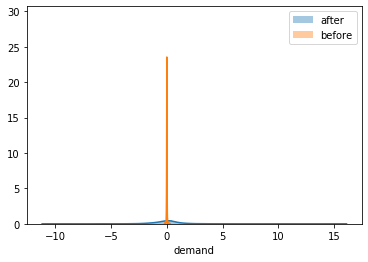

In [157]:
sns.distplot(
    pred_preprocess.fit_transform(lv2_df_train[['demand']]).T[0][:1000],
    label='after'
)

sns.distplot(
    lv2_df_train['demand'].loc[:1000],
    label='before'
)
plt.legend()
plt.show()

In [158]:

dlm_pipeline_lv2.fit(
    lv2_df_train[features],
    pred_preprocess.fit_transform(lv2_df_train[['demand']]).T[0],
    sequential__epochs=2,
    sequential__batch_size=512
)

Epoch 1/2
1756608/1756608 [==============================] - 198s 113us/step - loss: 0.4591 - mean_squared_error: 0.7905 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 197.0238
Epoch 2/2
1756608/1756608 [==============================] - 197s 112us/step - loss: 0.4407 - mean_squared_error: 0.7248 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 227.9920


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['is_weekend', 'dow', 'hour',
                    

In [159]:
dlm_pipeline_lv2.predict(lv2_df_train[features].head(100))

array([[-5.76278977e-02],
       [ 5.51301520e-04],
       [-2.33645424e-01],
       [-1.10107772e-02],
       [-3.99240464e-01],
       [-3.45139913e-02],
       [-3.58304791e-02],
       [-6.43936843e-02],
       [-6.09142184e-01],
       [-2.97024995e-01],
       [-1.77581862e-01],
       [-7.40557551e-01],
       [-5.22524834e-01],
       [-7.03703016e-02],
       [-3.96048278e-01],
       [-3.39112788e-01],
       [-2.49079660e-01],
       [ 7.96316937e-03],
       [-8.70864242e-02],
       [ 1.25228241e-01],
       [ 2.83464380e-02],
       [-3.78201813e-01],
       [ 4.26513739e-02],
       [-2.08613388e-02],
       [ 1.46435297e+00],
       [ 1.14587796e+00],
       [ 1.31349981e+00],
       [ 2.32566023e+00],
       [ 1.33767164e+00],
       [ 1.53285062e+00],
       [ 1.44690168e+00],
       [ 2.50205946e+00],
       [-4.98795025e-02],
       [-4.65904586e-02],
       [-1.48572639e-01],
       [-3.76983993e-02],
       [-2.25266926e-02],
       [-4.49705534e-02],
       [-1.3

In [160]:
pred_preprocess.inverse_transform(
    dlm_pipeline_lv2.predict(lv2_df_train[features].head(100))
)

array([[-1.0616129e-03],
       [ 2.2113469e-05],
       [-4.3403595e-03],
       [-1.9325783e-04],
       [-7.4249622e-03],
       [-6.3106127e-04],
       [-6.5558398e-04],
       [-1.1876418e-03],
       [-1.1334882e-02],
       [-5.5209552e-03],
       [-3.2960419e-03],
       [-1.3782807e-02],
       [-9.7214272e-03],
       [-1.2989705e-03],
       [-7.3655001e-03],
       [-6.3049407e-03],
       [-4.6278588e-03],
       [ 1.6017719e-04],
       [-1.6103482e-03],
       [ 2.3445189e-03],
       [ 5.3986418e-04],
       [-7.0330668e-03],
       [ 8.0632773e-04],
       [-3.7674807e-04],
       [ 2.7288912e-02],
       [ 2.1356555e-02],
       [ 2.4478912e-02],
       [ 4.3332811e-02],
       [ 2.4929170e-02],
       [ 2.8564844e-02],
       [ 2.6963841e-02],
       [ 4.6618670e-02],
       [-9.1728056e-04],
       [-8.5601432e-04],
       [-2.7556757e-03],
       [-6.9037848e-04],
       [-4.0776923e-04],
       [-8.2583970e-04],
       [-2.5909869e-03],
       [-1.2302290e-03],


In [161]:
lv2_df_train['dl_y_hat_err'] = pred_preprocess.inverse_transform(
    dlm_pipeline_lv2.predict(lv2_df_train[features])
)

In [162]:
lv2_df_train['dl_y_hat_err'].head(100).describe()

count    100.000000
mean      -0.001190
std        0.011052
min       -0.020842
25%       -0.006437
50%       -0.001382
75%        0.000842
max        0.046619
Name: dl_y_hat_err, dtype: float64

In [197]:
lv2_df_train['ensemble_dl_y_hat']  = lv2_df_train['y_hat'] - lv2_df_train['dl_y_hat_err']

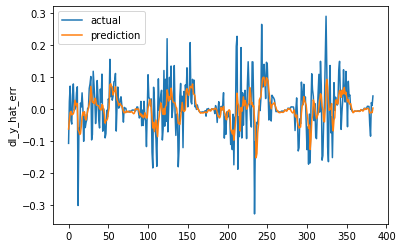

In [211]:
show_prediction_vs_actual_for_geo(
    lv2_df_train[lv2_df_train.day.isin([10,11, 12, 13])], 'qp02zz',
    target_col='demand',
    pred_col='dl_y_hat_err'
)

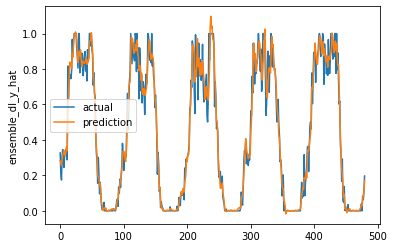

In [210]:
show_prediction_vs_actual_for_geo(
    lv2_df_train[lv2_df_train.day.isin([10,11, 12, 13, 14])], 'qp02zz',
    target_col='y_true',
    pred_col='ensemble_dl_y_hat'
)

In [205]:
lv2_df_train['err_lv2'] = lv2_df_train['ensemble_dl_y_hat'] - lv2_df_train['y_true']

In [208]:
result_lv1 = rmse_per_region_geo(
    lv2_df_train['geohash6'],
    lv2_df_train['y_true'],
    lv2_df_train['y_hat']
)

In [200]:
result_lv2 = rmse_per_region_geo(
    lv2_df_train['geohash6'],
    lv2_df_train['y_true'],
    lv2_df_train['ensemble_dl_y_hat']
)

In [201]:
print(result_lv2.rmse.mean())
print(result_lv2.MAPE.mean())

0.012210804294245602
-4.472168204857655


In [204]:
result_lv2.sort_values(by='rmse', ascending=False).head()

,geohash6,mse,y_true,rmse,MAPE
32,qp02zz,0.004016,0.439528,0.063372,-30.253783
29,qp02zw,0.003031,0.494602,0.055054,-32.889752
863,qp09ft,0.002729,0.519236,0.052242,-33.997805
459,qp090t,0.002501,0.221045,0.050011,-17.898137
30,qp02zx,0.002390,0.189570,0.048883,-15.735113


In [209]:
result_lv1.sort_values(by='rmse', ascending=False).head()

,geohash6,mse,y_true,rmse,MAPE
32,qp02zz,0.005504,0.439528,0.074187,-30.150442
29,qp02zw,0.005302,0.494602,0.072817,-32.737781
863,qp09ft,0.005190,0.519236,0.072039,-33.835859
785,qp09d8,0.003528,0.603540,0.059393,-37.417987
459,qp090t,0.003178,0.221045,0.056372,-17.842716


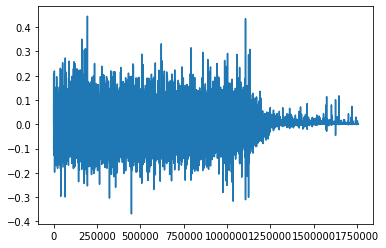

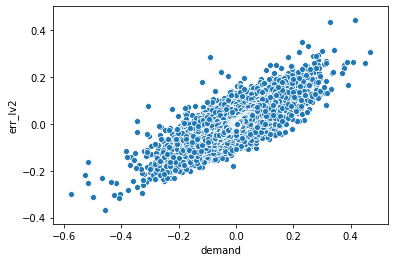

In [207]:
plt.plot(
    np.arange(lv2_df_train.shape[0]),
    lv2_df_train['err_lv2']
)
plt.show()

sns.scatterplot(
    lv2_df_train.demand,
    lv2_df_train['err_lv2']
)
plt.xlabel('demand')
plt.show()

In [8]:
dlm1_mdl = MyDL1Model()
dlm1_mdl.fit_raw(train_set, epochs=2, batch_size=256)

/home/arie/external/aiforsea-private/util.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['day'] = df_sample['day'].astype(np.int)
/home/arie/external/aiforsea-private/util.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sample['is_weekend'] = df_sample.day.map(lambda x: (max(x, 0) - 5) % 7 == 0 or (max(x, 0) - 6) % 7 == 0)
/home/arie/external/aiforsea-private/util.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


/home/arie/external/aiforsea-private/util.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q95'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.95))
/home/arie/external/aiforsea-private/util.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['demand_gdow_q10'] = df_train.groupby(['geohash6', 'dow'])['demand'].transform(lambda x: x.quantile(.1))
/home/arie/external/aiforsea-private/util.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [ ]:
target_preprocessor = RobustScaler()
dlm1_mdl.fit_raw(
    train_set, 
    target_preprocessor=target_preprocessor,
    sequential__epochs=4, sequential__shuffle=False, sequential__batch_size=256
)

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 59)                3540      
_________________________________________________________________
dense_48 (Dense)             (None, 256)               15360     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 9         
Total para

/home/arie/miniconda2/envs/data_analysis_36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Epoch 1/4
1756608/1756608 [==============================] - 21s 12us/step - loss: 234083.0377 - mean_squared_error: 0.0268 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 234083.0377
Epoch 2/4
1756608/1756608 [==============================] - 21s 12us/step - loss: 6737.6378 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 6737.6378
Epoch 3/4
1756608/1756608 [==============================] - 21s 12us/step - loss: 7282.0382 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 7282.0382
Epoch 4/4
1528576/1756608 [=========================>....] - ETA: 2s - loss: 4097.7485 - mean_squared_error: 0.0209 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 4097.7485

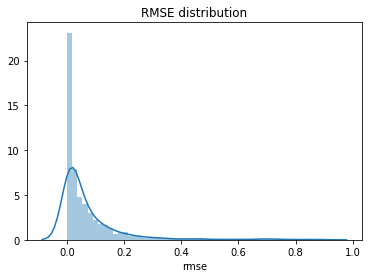

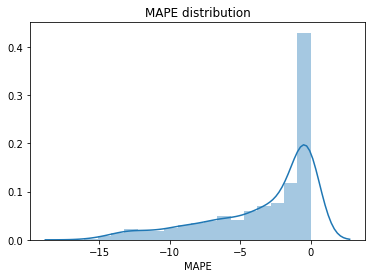

mean rmse: 0.07302684711554523
mean MAPE: -3.395334364802963


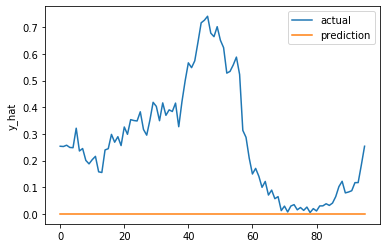

In [27]:
res_df_benchmark = dlm1_mdl.predict_futures(n_ticks=96)
show_all_evaluation_metrics(res_df_benchmark, test_set)

In [28]:
res_df_benchmark.y_hat.describe()

count    125472.000000
mean          0.000061
std           0.000000
min           0.000061
25%           0.000061
50%           0.000061
75%           0.000061
max           0.000061
Name: y_hat, dtype: float64